# **1. Setup for using Tensorflow Library**

In [1]:
import numpy as np #numerical operations
import pandas as pd #data manipulations
import tensorflow as tf #mainly used to create neural networks
import matplotlib.pyplot as plt #create visualizations like graphs and charts
import seaborn as sns #informative statistical graphs
plt.rcParams['figure.figsize'] = (20,20) #sets default size of the graphs created by Matplotlib

# **2. Looking at our images.**


**Normal X Ray Image**

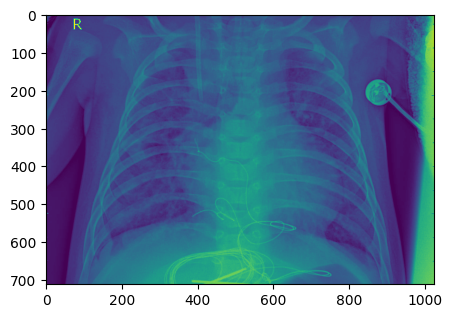

In [2]:
from glob import glob #used to get a list of file paths
path_train = "/kaggle/input/chest-xray-pneumonia/chest_xray/train" #sets the path for the training data set
img = glob(path_train + "/PNEUMONIA/*.jpeg") #gets the list of file paths for jpegs from the pneumonia file from the training data set

img = np.asarray(plt.imread(img[0])) #reads the first image file from the list created above
plt.figure(figsize = (5,5)) #sets the size of the figure to 5 x 5 inches
plt.imshow(img) #Display image

**Normal X Ray Image**

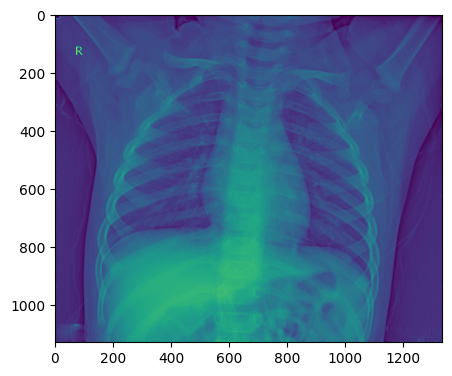

In [3]:
img = glob(path_train + "/NORMAL/*.jpeg") #creates a list of file paths for jpegs from the normal file from the training data set
img = np.asarray(plt.imread(img[0])) #reads the first image file from the list created above
plt.figure(figsize = (5,5)) #sets the size of the figure to 5x5 inches
plt.imshow(img) #Display image

# 3. Acquiring our dataset from the directories.

**Importing libraries that are used for creating a convulation neural network model.**

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array 
#load_image converts any image file to a PIL(Python Imaging Library) image
#img_to_array converts any PIL/Keras image tensor to Numpy array

In [5]:
from tensorflow.keras.models import Sequential, Model
#Sequential makes sure that the model is made step by step, layer after layer

In [6]:
from tensorflow.keras.layers import Conv2D,Dense,Flatten,Input,MaxPooling2D,Dropout,BatchNormalization
#Convolutional layer for 2D
#Dense is a fully connected network, every neuron to every neuron in the previous and next layer
#Used to convert a multi-dimensional input tensor to one dimensional tensor
#Input is the input layer
#Max Pooling operation, will decrease the size of the matrix
#Dropout - A method used to prevent overfitting, it will ignore some random neurons during training
#Normalises and scales the input

**Using Image Data Generator we load the image to our model.**

In [7]:
img_size=150
batch_size=32

traingen=ImageDataGenerator(rescale=1/255.,
                           brightness_range=[0.2,1.2],
                           width_shift_range=0.1,
                           height_shift_range=0.1,
                           horizontal_flip=True)
#rescale ==> Rescales the pixel values with the 0-1 range
#Randomly rotates the image, max. 50 degree
#Randomly set the brightness of the image within the given range


testgen=ImageDataGenerator(rescale=1/255.)

valgen=ImageDataGenerator(rescale=1/255.,                    
                           brightness_range=[0.2,1.2],
                           width_shift_range=0.1,
                           height_shift_range=0.1,
                           horizontal_flip=True)

In [8]:
traindata=traingen.flow_from_directory('/kaggle/input/chest-xray-pneumonia/chest_xray/train',
                                   target_size=(img_size,img_size),
                                   batch_size = batch_size,
                                   shuffle=True,
                                   class_mode='binary',
                                   color_mode='grayscale')
testdata=testgen.flow_from_directory('/kaggle/input/chest-xray-pneumonia/chest_xray/test',
                                    shuffle=False,
                                    batch_size=batch_size,
                                    target_size=(img_size,img_size),
                                    class_mode='binary',
                                    color_mode='grayscale')
valdata=valgen.flow_from_directory('/kaggle/input/chest-xray-pneumonia/chest_xray/val',
                                  shuffle=False,
                                    batch_size=batch_size,
                                   target_size=(img_size,img_size),
                                   class_mode='binary',
                                   color_mode='grayscale'
                                  )
#shuffle ==> Randomly shuffles the data for every epoch during training
#Binary specifies only the 2 options as classification
#Grayscale reads the images in b/w

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


**Generating Visual Representation of the Training data**

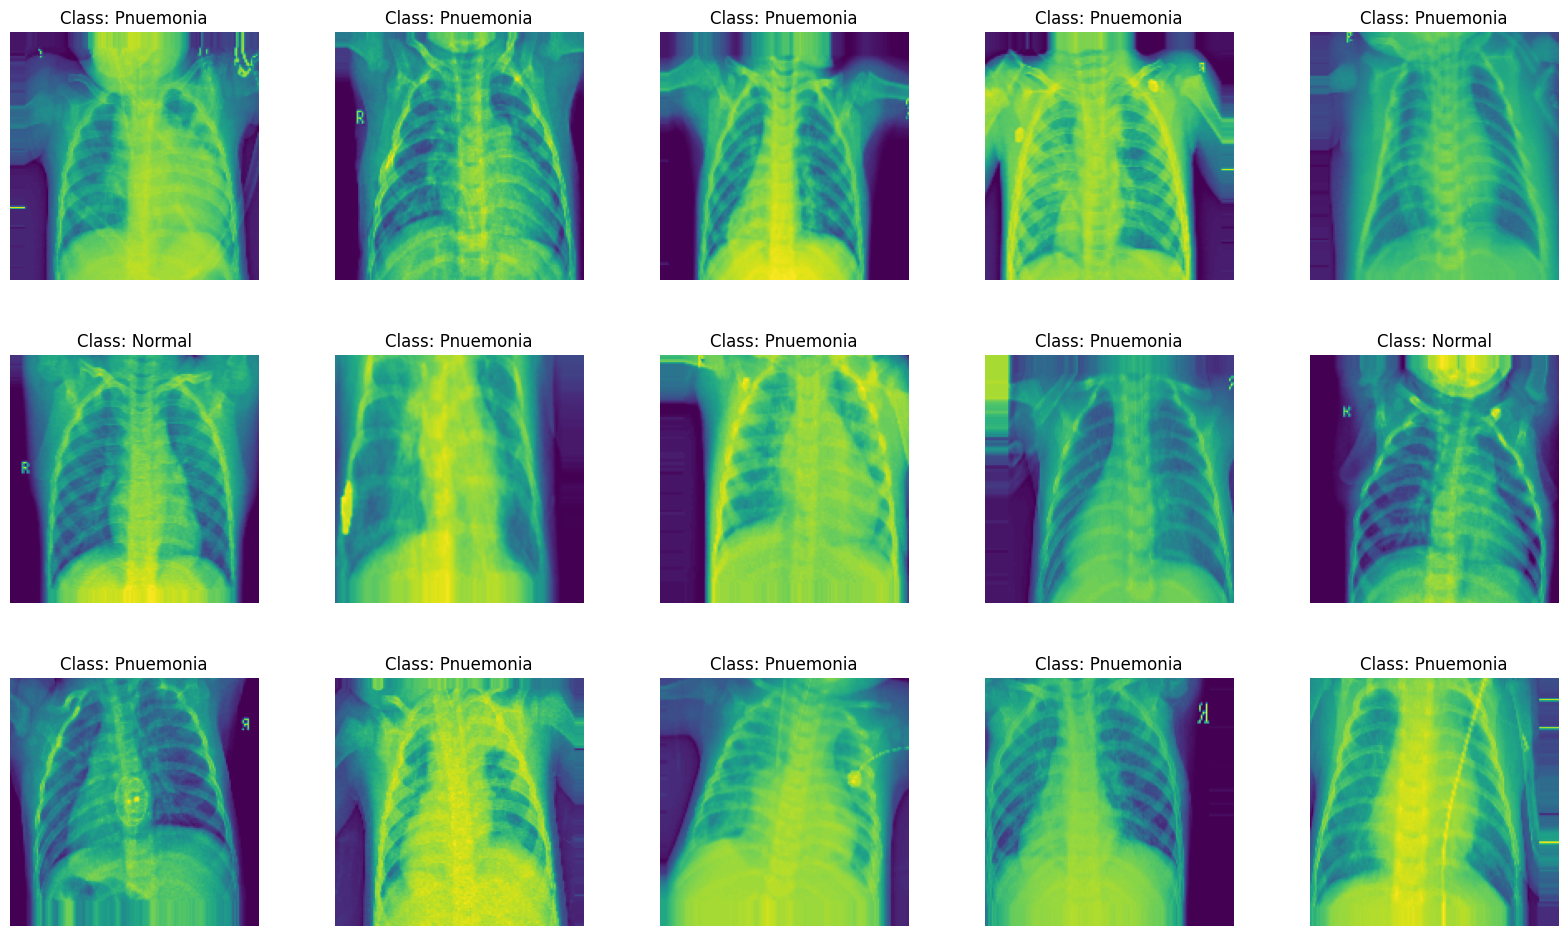

In [9]:
labels=['Normal','Pnuemonia'] #Labels for binary classification
samples=traindata.__next__() #gets the next batch of label and image from training data generator

images=samples[0] #contains the batch of images
target=samples[1] #contains the corresponding labels, 0 for normal and 1 for pneumonia

for i in range(15): #first 15 images in the batch
    plt.subplot(5,5,i+1)
    plt.subplots_adjust(hspace=0.3, wspace=.3)
    plt.imshow(images[i])
    plt.title(f"Class: {labels[int(target[i])]}")
    plt.axis('off')

In [10]:
samples[1]

array([1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.],
      dtype=float32)

In [11]:
df=pd.DataFrame(traindata.classes)
df.value_counts()

1    3875
0    1341
Name: count, dtype: int64

In [ ]:
df=pd.DataFrame(valdata.classes)
df.value_counts()

In [ ]:
df=pd.DataFrame(testdata.classes)
df.value_counts()

# **4. Creating CNN**

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'
model=Sequential() #Layer by layer NN starts here
model.add(Conv2D(32,(2,2),input_shape=(img_size,img_size,1),activation="relu",padding='same',strides=1))
#32 Filters of size 2x2, input shape of the image in given size and grayscale, using relu activation function, stride is the step size
model.add(MaxPooling2D())
#Pooling and decreasing of the dimensions
model.add(Conv2D(64,(2,2),strides=2,activation="relu",padding="same"))
#64 filters and larger strides of 2
model.add(MaxPooling2D())
model.add(Conv2D(128,(2,2), strides=1,activation="relu",padding='same'))
model.add(MaxPooling2D())
model.add(Flatten())
#Flattens the previous layer, converting the multi-dimentional image to a complete single-dimension
model.add(Dense(128,activation="relu"))
#Fully connected network with 128 neurons
model.add(Dense(1,activation='sigmoid'))
#Final output layer with only one neuron, satisfying our need of classifying binary

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer = 'adam', loss='binary_crossentropy',metrics=['accuracy'])
#adam because it is good
#binary_crossentropy is mostly used when we only have a binary ouputs
#metrics is accuracy because that is what we judge our model on

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
filepath = "model_cnn.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False)
#save_best_only ==> when true will only save the model weights when the validation loss improves
#save_wights_only ==> when false saves the entire model, when true saves only the model weights

# **5. Training the CNN Model**

In [ ]:
history=model.fit(traindata,validation_data=valdata, epochs=15, callbacks=[checkpoint])
#callback is the checkpoint defined above
#history is an object which contains all the data during the training process like val_loss and accuracy, and updates over every epoch

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(history.history['loss'])
#plot the training loss over every epoch
plt.plot(history.history['val_loss'])
#plot the validation loss
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Val'],loc='upper left')
plt.show()


In [ ]:
plt.figure(figsize=(20,8))
plt.plot(history.history['accuracy'])
#plot the training accuracy over all the epochs
plt.plot(history.history['val_accuracy'])
#plot the validation accuracy over all the epochs
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Val'],loc='upper left')
plt.show()

**Checking the Model Predictions for VChecking the Model Predictions for Validation Dataalidation Data**

In [ ]:
y_test=valdata.classes
#has all the labels in form of binary for all the samples in the validation dataset
y_pred=model.predict(valdata)
#predicts the probabilities of every sample in the validation dataset using the trained model
y_pred_probs=y_pred.copy()
#saves a copy of the predicted probabilities
y_pred[y_pred>0.5]=1
#makes all the predictions with probability greater that 0.5 equal to calss label 1 
y_pred[y_pred<0.5]=0
#makes all the predictions with probability smaller that 0.5 equal to class label 0 

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

**Classification Report for the Predictions on the Validation Data**

In [ ]:
print(classification_report(y_test, y_pred, target_names=['Normal','Pneumonia']))

**Confusion Matrix**

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.3g',xticklabels=['Normal','Pnuemonia'],
            yticklabels=['Normal','Pnuemonia'],cmap='Blues')
plt.show()

**Checking the Model Predictions for Test Data**

In [ ]:
y_test = testdata.classes
#has the binary class labels for the original test data
y_pred = model.predict(testdata)
#has the predictions for all the samples from the test data after running the model on it
y_pred_probs = y_pred.copy()
#creates a copy for all the predictions

In [ ]:
y_pred[y_pred>0.5] = 1
y_pred[y_pred<0.5] = 0

#Convert the predictions to the binary classes

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

**Classification Report for the Predictions on the Test Data**

In [ ]:
print(classification_report(y_test,y_pred,target_names = ['Normal','Pnuemonia']))

**Confusion Matrix**

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.3g',xticklabels=['Normal','Pnuemonia'],
            yticklabels=['Normal','Pnuemonia'],cmap='Blues')
plt.show()